<a href="https://colab.research.google.com/github/alphaczar/Deep-Learning/blob/master/Multiclass_Vehicle_Classification_res50.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
%reload_ext autoreload
%autoreload 2
%matplotlib inline

In [ ]:
import warnings
warnings.filterwarnings('ignore')
from fastai.vision import *
from fastai.metrics import error_rate
from fastai.imports import *

In [ ]:
tfms = get_transforms(do_flip = True,flip_vert = False,max_rotate=30, max_zoom=1.2, max_lighting=0.3, max_warp=0.3,p_affine=0.9,p_lighting=0.9)

In [ ]:
path = '/content/drive/My Drive/MutiClass Vehicle/'
data = ImageDataBunch.from_csv(path, folder='train', csv_labels='labels.csv',test ='test',seed=1,valid_pct=0.2,ds_tfms = tfms,size=224,bs=64).normalize(imagenet_stats)

In [ ]:
data

ImageDataBunch;

Train: LabelList (4000 items)
x: ImageList
Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224)
y: CategoryList
Bicycle,Bicycle,Bicycle,Bicycle,Bicycle
Path: /content/drive/My Drive/MutiClass Vehicle;

Valid: LabelList (1000 items)
x: ImageList
Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224)
y: CategoryList
Bus,Motorcycle,Car,Car,Bus
Path: /content/drive/My Drive/MutiClass Vehicle;

Test: LabelList (788 items)
x: ImageList
Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224)
y: EmptyLabelList
,,,,
Path: /content/drive/My Drive/MutiClass Vehicle

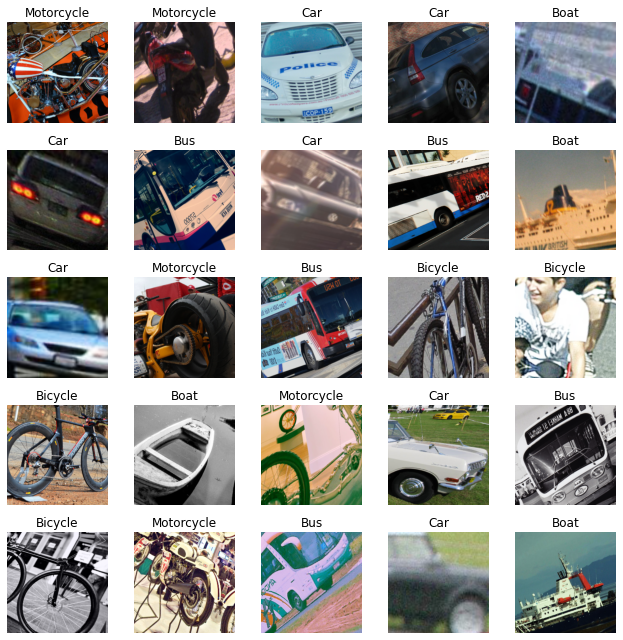

In [ ]:
data.show_batch(row=3, figsize=(9,9))

In [ ]:
data.classes

['Bicycle', 'Boat', 'Bus', 'Car', 'Motorcycle']

In [ ]:
learn = cnn_learner(data, models.resnet50,metrics=[accuracy,error_rate])

Downloading: "https://download.pytorch.org/models/resnet50-19c8e357.pth" to /root/.cache/torch/checkpoints/resnet50-19c8e357.pth


In [ ]:
learn.model

Sequential(
  (0): Sequential(
    (0): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
    (1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ReLU(inplace=True)
    (3): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
    (4): Sequential(
      (0): Bottleneck(
        (conv1): Conv2d(64, 64, kernel_size=(1, 1), stride=(1, 1), bias=False)
        (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
        (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (conv3): Conv2d(64, 256, kernel_size=(1, 1), stride=(1, 1), bias=False)
        (bn3): BatchNorm2d(256, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (relu): ReLU(inplace=True)
        (downsample): Sequential(
          (0): Conv2d(64, 256

In [ ]:
learn.summary()

Sequential
Layer (type)         Output Shape         Param #    Trainable 
Conv2d               [64, 112, 112]       9,408      False     
______________________________________________________________________
BatchNorm2d          [64, 112, 112]       128        True      
______________________________________________________________________
ReLU                 [64, 112, 112]       0          False     
______________________________________________________________________
MaxPool2d            [64, 56, 56]         0          False     
______________________________________________________________________
Conv2d               [64, 56, 56]         4,096      False     
______________________________________________________________________
BatchNorm2d          [64, 56, 56]         128        True      
______________________________________________________________________
Conv2d               [64, 56, 56]         36,864     False     
___________________________________________________

In [ ]:
learn.lr_find()

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


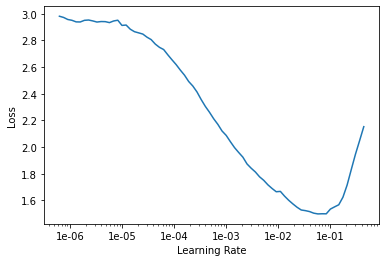

In [ ]:
learn.recorder.plot()
#learn.recorder.plot(skip_start=0,skip_end =5)

In [ ]:
from fastai.callbacks import *
learn.fit_one_cycle(10,  slice(1e-05,1e-1),callbacks=[SaveModelCallback(learn,every="improvement",monitor='accuracy',name='res50')])

epoch,train_loss,valid_loss,accuracy,error_rate,time
0,0.557340,0.323651,0.884000,0.116000,07:53
1,0.807298,0.381095,0.896000,0.104000,04:07
2,0.814784,1.270439,0.819000,0.181000,04:08
3,0.860989,0.551053,0.913000,0.087000,04:09
4,0.745035,0.432326,0.906000,0.094000,04:10
5,0.542786,0.198922,0.939000,0.061000,04:17
6,0.377079,0.180774,0.942000,0.058000,04:15
7,0.287090,0.149873,0.946000,0.054000,04:09
8,0.239246,0.143051,0.946000,0.054000,04:05
9,0.216452,0.144166,0.946000,0.054000,04:05


Better model found at epoch 0 with accuracy value: 0.8840000033378601.
Better model found at epoch 1 with accuracy value: 0.8960000276565552.
Better model found at epoch 3 with accuracy value: 0.9129999876022339.
Better model found at epoch 5 with accuracy value: 0.9390000104904175.
Better model found at epoch 6 with accuracy value: 0.9419999718666077.
Better model found at epoch 7 with accuracy value: 0.9459999799728394.


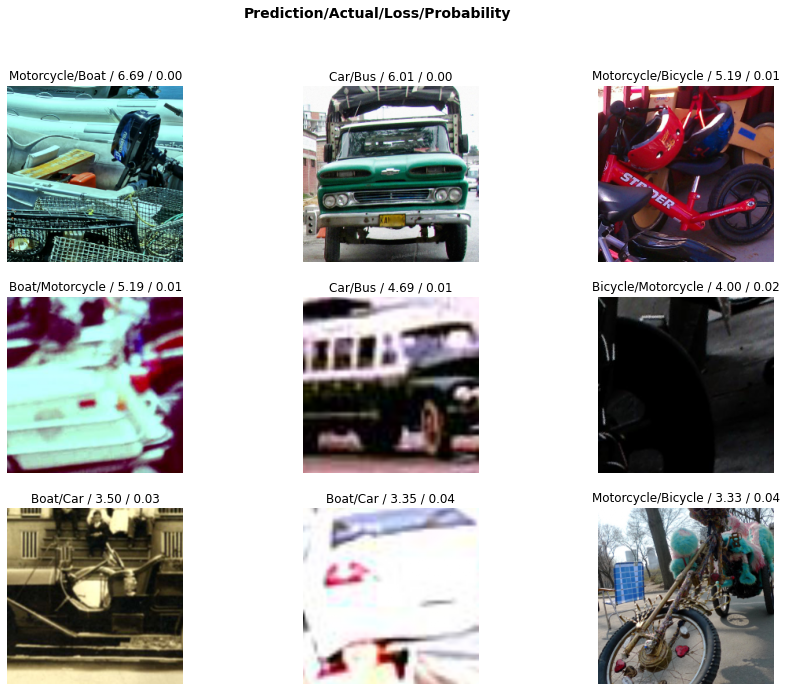

In [ ]:
interp = ClassificationInterpretation.from_learner(learn)
interp.plot_top_losses(9,figsize=(15,11))

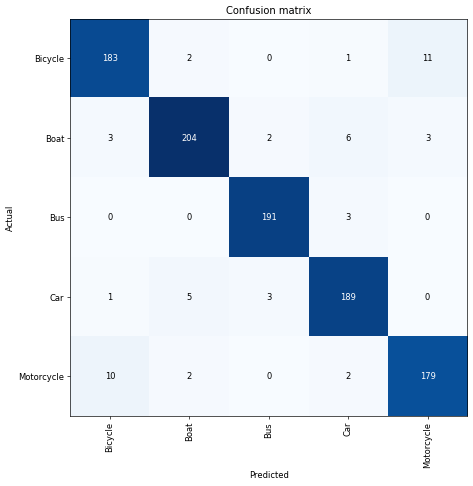

In [ ]:
interp.plot_confusion_matrix(figsize =(8,8),dpi=60)

In [ ]:
interp.most_confused(min_val=2)

[('Bicycle', 'Motorcycle', 11),
 ('Motorcycle', 'Bicycle', 10),
 ('Boat', 'Car', 6),
 ('Car', 'Boat', 5),
 ('Boat', 'Bicycle', 3),
 ('Boat', 'Motorcycle', 3),
 ('Bus', 'Car', 3),
 ('Car', 'Bus', 3),
 ('Bicycle', 'Boat', 2),
 ('Boat', 'Bus', 2),
 ('Motorcycle', 'Boat', 2),
 ('Motorcycle', 'Car', 2)]

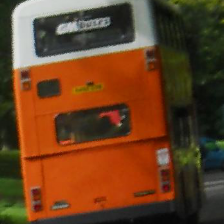

In [ ]:
data.test_ds[199][0]

In [ ]:
# predicting on single image by renet34 model
img=data.test_ds[199][0]
p=learn.predict(img)
print(int(p[0]))
print(str(p[0]))

2
Bus


In [ ]:
from tqdm import tqdm
pred=[]
images=[]
pred_s=[]
for i in tqdm(range(len(data.test_ds))):
  image=str(data.test_ds.items[i]).split('/')[-1]
  images.append(image)
  p=learn.predict(data.test_ds[i][0])
  #pred.append(int(p[0]))
  pred_s.append(str(p[0]))

100%|██████████| 788/788 [06:08<00:00,  2.14it/s]


In [ ]:
# saving test image name, predicted value and class name in dataframe
df=pd.DataFrame(list(zip(images,pred_s)),columns=['image_name','preds_res50'])

In [ ]:
df.head()

,image_name,preds_res50
0,000067_19.jpg,Bus
1,000087_06.jpg,Bus
2,000068_10.jpg,Bus
3,000092_02.jpg,Bus
4,000088_17.jpg,Bus


In [ ]:
sub_file=pd.read_csv(path + 'final_sub.csv')

In [ ]:
sub_file.head()

,Unnamed: 0,image_name,tags,preds
0,0,001178_05.jpg,Bicycle,Bicycle
1,1,001184_08.jpg,Bicycle,Bicycle
2,2,001188_03.jpg,Bicycle,Bicycle
3,3,001195_05.jpg,Bicycle,Bicycle
4,4,001201_19.jpg,Bicycle,Bicycle


In [ ]:
final_sub = pd.merge (sub_file,df,on='image_name')

In [ ]:
final_sub.columns = ['index','image_name','tags','preds_res34','preds_res50']
final_sub1 = final_sub.iloc[:,1:5]
#final_sub1.head()

In [ ]:
final_sub1.to_csv(path + 'final_sub1.csv',index=False)